In [1]:
import numpy as np

from PBP.datasources import ChunkDS
from PBP.models import LogRegModel, FrontierSelection, SKlearnWrapper
from PBP.objfuncs import Accuracy, Fscore
import os
import numpy as np

from sklearn.neural_network import MLPClassifier
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [69]:
train = ChunkDS(samples=6e4)
dev = ChunkDS(skip=int(6e4), samples=2e4)
test = ChunkDS(skip=int(8e4), samples=2e4)

In [3]:
accuracy = Accuracy()
fscore = Fscore()

# First Neural Network

In [6]:
neuralNet = SKlearnWrapper(MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 20), verbose=True))

In [7]:
neuralNet.fit(train)

Iteration 1, loss = 0.48085101
Iteration 2, loss = 0.43433849
Iteration 3, loss = 0.43296426
Iteration 4, loss = 0.43390003
Iteration 5, loss = 0.42978538
Iteration 6, loss = 0.42942295
Iteration 7, loss = 0.42923030
Iteration 8, loss = 0.42887850
Iteration 9, loss = 0.42770133
Iteration 10, loss = 0.42894950
Iteration 11, loss = 0.42827594
Iteration 12, loss = 0.42872214
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


In [18]:
print("accuracy for Neural Network is : {:.3f} %"\
      .format(100 * accuracy.evaluate(neuralNet.predict(test),
                                      test.getData().loc[:, test.getLabel()])))
print("fscore for Neural Network is : {:.3f} %"\
      .format(100 * fscore.evaluate(neuralNet.predict(test),
                                      test.getData().loc[:, test.getLabel()])))
accuracy.accuracy_matrix(neuralNet, test)

accuracy for Neural Network is : 82.986 %
fscore for Neural Network is : 0.000 %


/home/mrivet/Documents/CS229/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])


Prediction      0  1
Reality             
0           14832  0
1            3041  0

# Try to balance the data

In [20]:
train_balanced = ChunkDS(samples=6e4)
train_balanced.balance_data()

In [22]:
neuralNet.fit(train_balanced)

Iteration 1, loss = 0.68376605
Iteration 2, loss = 0.67978299
Iteration 3, loss = 0.68309055
Iteration 4, loss = 0.69169562
Iteration 5, loss = 0.68821828
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


In [23]:
print("accuracy for Neural Network is : {:.3f} %"\
      .format(100 * accuracy.evaluate(neuralNet.predict(test),
                                      test.getData().loc[:, test.getLabel()])))
print("fscore for Neural Network is : {:.3f} %"\
      .format(100 * fscore.evaluate(neuralNet.predict(test),
                                      test.getData().loc[:, test.getLabel()])))
accuracy.accuracy_matrix(neuralNet, test)

accuracy for Neural Network is : 73.334 %
fscore for Neural Network is : 29.077 %


Prediction      0     1
Reality                
0           12130  2702
1            2064   977

# Try preprocessing

In [80]:
train_normalized = ChunkDS(samples=6e4)
train_normalized.balance_data()
train_normalized.normalize_data()

test.normalize_data()

In [37]:
neuralNet_renormalized = SKlearnWrapper(MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 20), verbose=True))

In [38]:
neuralNet_renormalized.fit(train_normalized)

Iteration 1, loss = 0.69342634
Iteration 2, loss = 0.69326535
Iteration 3, loss = 0.69318045
Iteration 4, loss = 0.69312658
Iteration 5, loss = 0.69276847
Iteration 6, loss = 0.69217412
Iteration 7, loss = 0.69102395
Iteration 8, loss = 0.68912213
Iteration 9, loss = 0.68546909
Iteration 10, loss = 0.67843005
Iteration 11, loss = 0.66875894
Iteration 12, loss = 0.65770542
Iteration 13, loss = 0.64867364
Iteration 14, loss = 0.64271701
Iteration 15, loss = 0.63899011
Iteration 16, loss = 0.63668831
Iteration 17, loss = 0.63552196
Iteration 18, loss = 0.63507271
Iteration 19, loss = 0.63451423
Iteration 20, loss = 0.63458022
Iteration 21, loss = 0.63270266
Iteration 22, loss = 0.63303020
Iteration 23, loss = 0.63233861
Iteration 24, loss = 0.63190691
Iteration 25, loss = 0.63198263
Iteration 26, loss = 0.63130677
Iteration 27, loss = 0.63127992
Iteration 28, loss = 0.63087175
Iteration 29, loss = 0.63098359
Iteration 30, loss = 0.63094310
Iteration 31, loss = 0.63015301
Iteration 32, los

In [39]:
print("accuracy for Neural Network is : {:.3f} %"\
      .format(100 * accuracy.evaluate(neuralNet_renormalized.predict(test),
                                      test.getData().loc[:, test.getLabel()])))
print("fscore for Neural Network is : {:.3f} %"\
      .format(100 * fscore.evaluate(neuralNet_renormalized.predict(test),
                                      test.getData().loc[:, test.getLabel()])))
accuracy.accuracy_matrix(neuralNet_renormalized, test)


accuracy for Neural Network is : 30.907 %
fscore for Neural Network is : 32.062 %


Prediction     0      1
Reality                
0           2610  12222
1            127   2914

# Frontier selection

In [40]:
frontier_neuralNet = FrontierSelection(neuralNet_renormalized, fscore, tqdm=True)

In [41]:
frontier_neuralNet.fit(train_normalized)

Iteration 1, loss = 0.69370265
Iteration 2, loss = 0.69327273
Iteration 3, loss = 0.69338562
Iteration 4, loss = 0.69329656
Iteration 5, loss = 0.69313641
Iteration 6, loss = 0.69302768
Iteration 7, loss = 0.69290801
Iteration 8, loss = 0.69290936
Iteration 9, loss = 0.69262929
Iteration 10, loss = 0.69211507
Iteration 11, loss = 0.69171285
Iteration 12, loss = 0.69141592
Iteration 13, loss = 0.69025851
Iteration 14, loss = 0.68908668
Iteration 15, loss = 0.68698484
Iteration 16, loss = 0.68403805
Iteration 17, loss = 0.68041684
Iteration 18, loss = 0.67509958
Iteration 19, loss = 0.66986787
Iteration 20, loss = 0.66343371
Iteration 21, loss = 0.65669079
Iteration 22, loss = 0.65126240
Iteration 23, loss = 0.64683082
Iteration 24, loss = 0.64365297
Iteration 25, loss = 0.64124233
Iteration 26, loss = 0.63910104
Iteration 27, loss = 0.63746545
Iteration 28, loss = 0.63700070
Iteration 29, loss = 0.63552353
Iteration 30, loss = 0.63472067
Iteration 31, loss = 0.63547462
Iteration 32, los

A Jupyter Widget

/home/mrivet/Documents/CS229/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])


accuracy for Neural Network is : 21.155 %
fscore for Neural Network is : 30.030 %


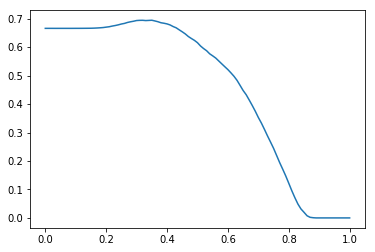

In [42]:
print("accuracy for Neural Network is : {:.3f} %"\
      .format(100 * accuracy.evaluate(frontier_neuralNet.model.predict(test),
                                      test.getData().loc[:, test.getLabel()])))
print("fscore for Neural Network is : {:.3f} %"\
      .format(100 * fscore.evaluate(frontier_neuralNet.model.predict(test),
                                      test.getData().loc[:, test.getLabel()])))
accuracy.accuracy_matrix(frontier_neuralNet.model, test)
frontier_neuralNet.plot_score_curve()

# Exploration

In [81]:
neuralNet_test = SKlearnWrapper(MLPClassifier(activation='logistic', hidden_layer_sizes=(30), verbose=True))

In [82]:
frontier_neuralNet = FrontierSelection(neuralNet_test, fscore, tqdm=True)

In [83]:
frontier_neuralNet.fit(train_normalized)

Iteration 1, loss = 0.69371574
Iteration 2, loss = 0.69300598
Iteration 3, loss = 0.69284281
Iteration 4, loss = 0.69258158
Iteration 5, loss = 0.69227788
Iteration 6, loss = 0.69197067
Iteration 7, loss = 0.69175894
Iteration 8, loss = 0.69144795
Iteration 9, loss = 0.69117025
Iteration 10, loss = 0.69067680
Iteration 11, loss = 0.69033995
Iteration 12, loss = 0.68988870
Iteration 13, loss = 0.68932612
Iteration 14, loss = 0.68879437
Iteration 15, loss = 0.68825626
Iteration 16, loss = 0.68747711
Iteration 17, loss = 0.68679181
Iteration 18, loss = 0.68591612
Iteration 19, loss = 0.68520239
Iteration 20, loss = 0.68421423
Iteration 21, loss = 0.68323845
Iteration 22, loss = 0.68217624
Iteration 23, loss = 0.68103275
Iteration 24, loss = 0.67980521
Iteration 25, loss = 0.67865590
Iteration 26, loss = 0.67729950
Iteration 27, loss = 0.67602316
Iteration 28, loss = 0.67462443
Iteration 29, loss = 0.67326980
Iteration 30, loss = 0.67193915
Iteration 31, loss = 0.67046622
Iteration 32, los

A Jupyter Widget

/home/mrivet/Documents/CS229/projet-basique/PBP/objfuncs/fscore.py:19: RuntimeWarning: invalid value encountered in long_scalars
  precision = matrix.loc[1, 1] / (matrix.loc[0, 1] + matrix.loc[1, 1])


accuracy for Neural Network is : 20.718 %
fscore for Neural Network is : 29.935 %


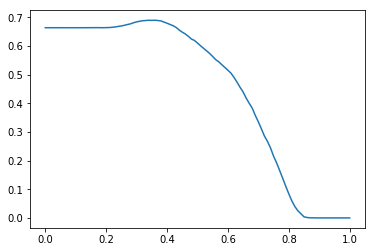

In [84]:
print("accuracy for Neural Network is : {:.3f} %"\
      .format(100 * accuracy.evaluate(frontier_neuralNet.model.predict(test),
                                      test.getData().loc[:, test.getLabel()])))
print("fscore for Neural Network is : {:.3f} %"\
      .format(100 * fscore.evaluate(frontier_neuralNet.model.predict(test),
                                      test.getData().loc[:, test.getLabel()])))
accuracy.accuracy_matrix(frontier_neuralNet.model, test)
frontier_neuralNet.plot_score_curve()